## 0. Постановка задачи

Данные содержат информацию о различных песнях: исполнитель, название, мода и т.д. Необходимо предсказать к какому жанру музыки композиция относится.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## 1. Считывание данных

In [2]:
data = pd.read_csv('music_genre.csv')

In [3]:
data = data.loc[:, data.columns != 'instance_id']

In [4]:
data

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


## 2. Визуализация данных

In [5]:
des = data.describe()
des

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [6]:
data.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.290453,0.356420,-0.083809,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.290453,1.000000,-0.347681,0.061862,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.356420,-0.347681,1.000000,-0.155507,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557
duration_ms,-0.083809,0.061862,-0.155507,1.000000,-0.066203,0.129738,0.019911,-0.102509,-0.083636,-0.130574
energy,0.216345,-0.791250,0.263934,-0.066203,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.364960,0.387970,-0.301277,0.129738,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780
liveness,-0.039468,-0.109220,-0.051465,0.019911,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110
loudness,0.317941,-0.730401,0.390859,-0.102509,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664
speechiness,0.224309,-0.163377,0.279767,-0.083636,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847
valence,0.124913,-0.270238,0.434557,-0.130574,0.396317,-0.272780,0.052110,0.340664,0.059847,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   track_name        50000 non-null  object 
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  object 
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  object 
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  obtained_date     50000 non-null  object 
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-null  object

In [8]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(len(categorical_columns))
print(len(numerical_columns))

7
10


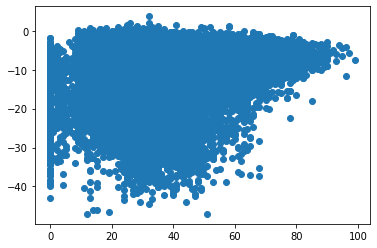

In [9]:
plt.scatter(data['popularity'], data['loudness'])
pass    

In [10]:
data1 = data.loc[:, numerical_columns]

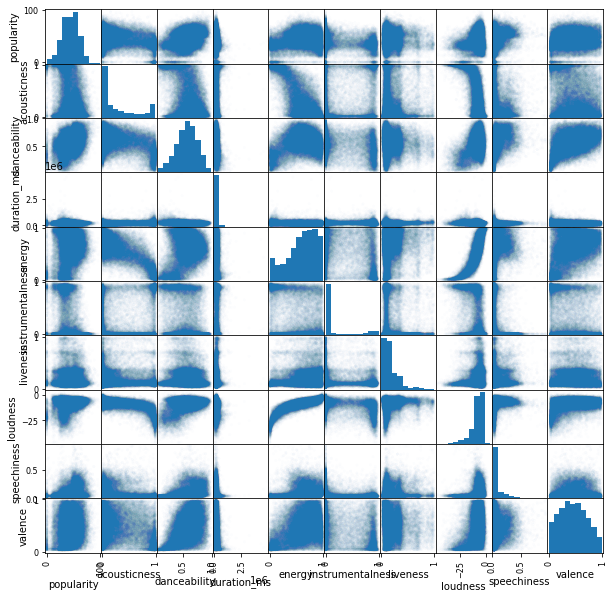

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data1, alpha = .01, figsize = (10, 10))
pass

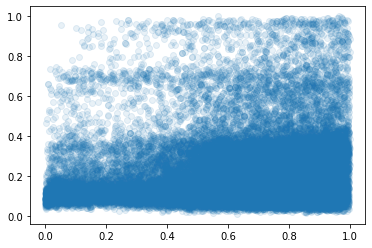

In [12]:
plt.scatter(data['energy'], data['liveness'],alpha = .1)
pass 

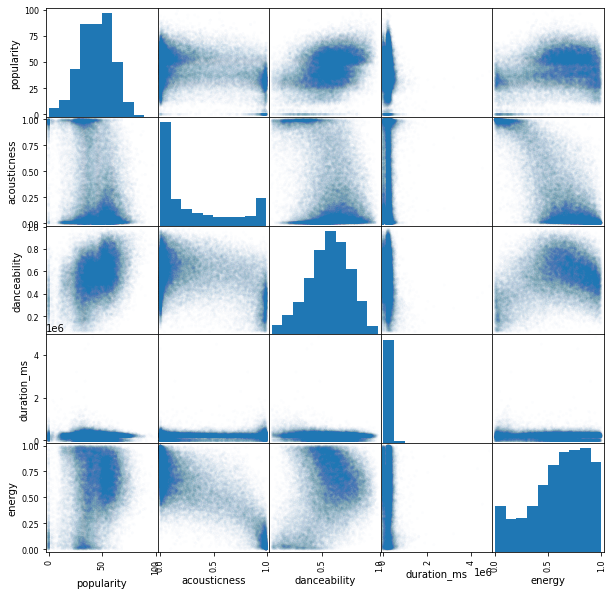

In [13]:
data2 = data.loc[:,['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy']]
scatter_matrix(data2, alpha = .01, figsize = (10, 10))
pass

Боремся с выбросами

In [14]:
data[numerical_columns].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0.005,0.0,0.000013,0.093499,-1.000,0.00681,0.000000,0.035999,-34.34004,0.024700,0.033900
0.010,0.0,0.000030,0.122000,-1.000,0.01260,0.000000,0.042300,-31.36601,0.025400,0.036299
0.050,18.0,0.000393,0.233000,-1.000,0.07280,0.000000,0.062400,-22.96625,0.028100,0.066400
0.100,25.0,0.001880,0.314000,39473.200,0.17500,0.000000,0.074590,-17.38320,0.030200,0.120000
0.500,45.0,0.144000,0.568000,219281.000,0.64300,0.000158,0.126000,-7.27650,0.048900,0.448000
0.900,63.0,0.927000,0.786000,335268.300,0.91900,0.856000,0.374000,-3.78800,0.246000,0.803000
0.950,68.0,0.978000,0.837000,401497.050,0.95300,0.908000,0.551000,-3.06500,0.323000,0.877000
0.990,76.0,0.994000,0.910000,596034.080,0.98500,0.950000,0.868000,-1.66700,0.463000,0.961000
0.995,79.0,0.995000,0.927000,747053.845,0.99100,0.961000,0.941005,-1.15200,0.515005,0.965000


In [15]:
temp = data['energy'] > 2
for c in numerical_columns:
    temp = temp | (data[c] < data[c].quantile(0.005)) | (data[c] > data[c].quantile(0.995))
rows_to_drop = data[temp].index
work_data = data.drop(rows_to_drop)

Данные после борьбы с выбросами

In [16]:
work_data

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [17]:
des = work_data.describe(include = 'all')
des

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,46472,46472,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472,46472.000000,46472.000000,46472,46472.000000,46472,46472,46472.000000,46472
unique,6684,38681,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,27638,5,NaN,10
top,empty_field,Forever,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,?,4-Apr,NaN,Country
freq,2310,15,NaN,NaN,NaN,NaN,NaN,NaN,5298,NaN,NaN,29846,NaN,4625,41782,NaN,4819
mean,NaN,NaN,44.447667,0.299403,0.562922,217247.158741,0.605013,0.169119,NaN,0.191302,-8.862253,NaN,0.091017,NaN,NaN,0.460811,NaN
std,NaN,NaN,15.213178,0.335226,0.171441,108245.552006,0.256093,0.314523,NaN,0.152093,5.565119,NaN,0.093940,NaN,NaN,0.242302,NaN
min,NaN,NaN,0.000000,0.000013,0.093600,-1.000000,0.006880,0.000000,NaN,0.036000,-34.340000,NaN,0.024700,NaN,NaN,0.033900,NaN
25%,NaN,NaN,34.000000,0.020200,0.450000,175612.250000,0.443000,0.000000,NaN,0.097800,-10.647500,NaN,0.035800,NaN,NaN,0.267000,NaN
50%,NaN,NaN,45.000000,0.141000,0.572000,219200.000000,0.646000,0.000119,NaN,0.127000,-7.228500,NaN,0.048600,NaN,NaN,0.454000,NaN
75%,NaN,NaN,56.000000,0.531000,0.688000,267606.250000,0.814000,0.110000,NaN,0.242000,-5.173000,NaN,0.096700,NaN,NaN,0.649000,NaN


In [18]:
corr_mat = work_data.corr()
corr_mat

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.282407,0.335876,-0.065277,0.212239,-0.352692,-0.028765,0.319923,0.234589,0.106064
acousticness,-0.282407,1.000000,-0.315428,0.029572,-0.781760,0.357766,-0.106004,-0.724254,-0.168020,-0.244184
danceability,0.335876,-0.315428,1.000000,-0.123009,0.230664,-0.256403,-0.049675,0.352137,0.286976,0.405196
duration_ms,-0.065277,0.029572,-0.123009,1.000000,-0.035125,0.114620,0.008098,-0.078587,-0.084355,-0.108813
energy,0.212239,-0.781760,0.230664,-0.035125,1.000000,-0.360097,0.178600,0.838219,0.164750,0.379889
instrumentalness,-0.352692,0.357766,-0.256403,0.114620,-0.360097,1.000000,-0.088870,-0.507132,-0.194427,-0.244481
liveness,-0.028765,-0.106004,-0.049675,0.008098,0.178600,-0.088870,1.000000,0.116941,0.114490,0.052950
loudness,0.319923,-0.724254,0.352137,-0.078587,0.838219,-0.507132,0.116941,1.000000,0.176125,0.313683
speechiness,0.234589,-0.168020,0.286976,-0.084355,0.164750,-0.194427,0.114490,0.176125,1.000000,0.059100
valence,0.106064,-0.244184,0.405196,-0.108813,0.379889,-0.244481,0.052950,0.313683,0.059100,1.000000


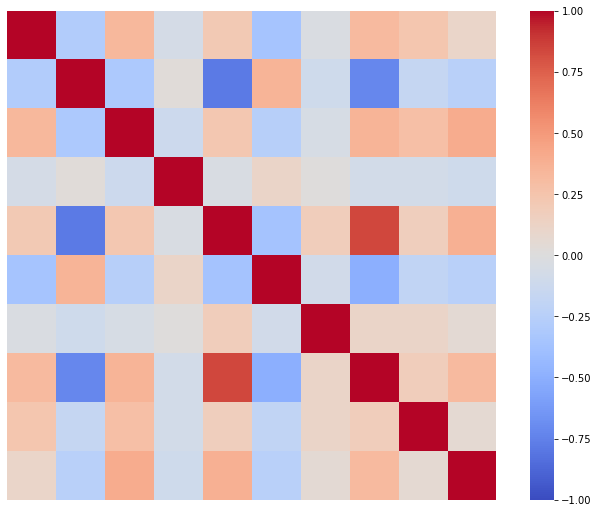

In [19]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, xticklabels='', yticklabels='', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
pass

In [20]:
corr_mat < -0.5

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,False,False,False,False,False,False,False,False,False,False
acousticness,False,False,False,False,True,False,False,True,False,False
danceability,False,False,False,False,False,False,False,False,False,False
duration_ms,False,False,False,False,False,False,False,False,False,False
energy,False,True,False,False,False,False,False,False,False,False
instrumentalness,False,False,False,False,False,False,False,True,False,False
liveness,False,False,False,False,False,False,False,False,False,False
loudness,False,True,False,False,False,True,False,False,False,False
speechiness,False,False,False,False,False,False,False,False,False,False
valence,False,False,False,False,False,False,False,False,False,False


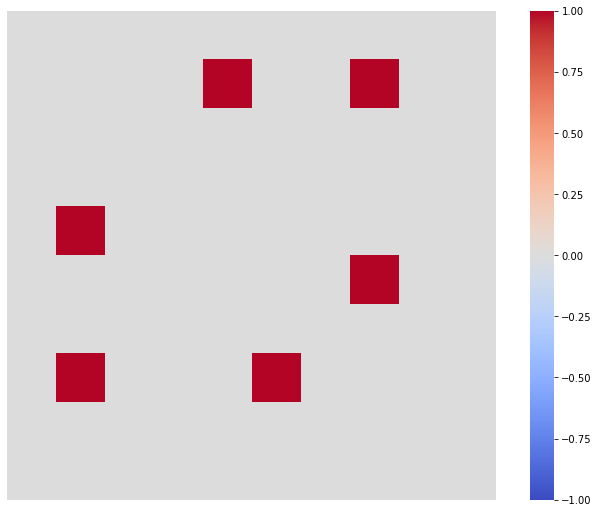

In [21]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat < -0.5, square=True, xticklabels='', yticklabels='', vmin=-1, vmax=1, center= 0, cmap='coolwarm')
pass

In [22]:
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack().sort_values(ascending=False)

instrumentalness  loudness   -0.507132
acousticness      loudness   -0.724254
                  energy     -0.781760
dtype: float64

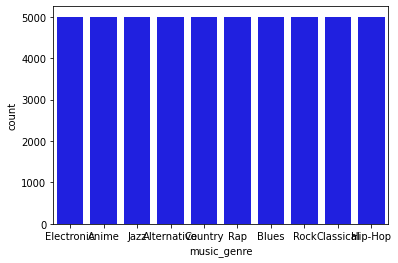

In [23]:
sns.countplot(x='music_genre', data=data, color='b')
pass

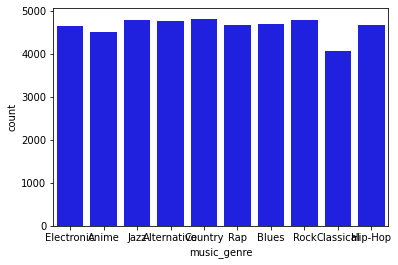

In [24]:
sns.countplot(x='music_genre', data=work_data, color='b')
pass

## 3. Обработка пропущенных значений

In [25]:
work_data.isna().sum() 

artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [26]:
work_data = work_data.dropna(axis = 0)

In [27]:
work_data.isna().sum() 

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

Стоит отметить, что в столбце tempo содержится значение '?', хотя должно содержать только числа.

In [28]:
work_data.describe(include='all')

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,46472,46472,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472,46472.000000,46472.000000,46472,46472.000000,46472,46472,46472.000000,46472
unique,6684,38681,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,27638,5,NaN,10
top,empty_field,Forever,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,?,4-Apr,NaN,Country
freq,2310,15,NaN,NaN,NaN,NaN,NaN,NaN,5298,NaN,NaN,29846,NaN,4625,41782,NaN,4819
mean,NaN,NaN,44.447667,0.299403,0.562922,217247.158741,0.605013,0.169119,NaN,0.191302,-8.862253,NaN,0.091017,NaN,NaN,0.460811,NaN
std,NaN,NaN,15.213178,0.335226,0.171441,108245.552006,0.256093,0.314523,NaN,0.152093,5.565119,NaN,0.093940,NaN,NaN,0.242302,NaN
min,NaN,NaN,0.000000,0.000013,0.093600,-1.000000,0.006880,0.000000,NaN,0.036000,-34.340000,NaN,0.024700,NaN,NaN,0.033900,NaN
25%,NaN,NaN,34.000000,0.020200,0.450000,175612.250000,0.443000,0.000000,NaN,0.097800,-10.647500,NaN,0.035800,NaN,NaN,0.267000,NaN
50%,NaN,NaN,45.000000,0.141000,0.572000,219200.000000,0.646000,0.000119,NaN,0.127000,-7.228500,NaN,0.048600,NaN,NaN,0.454000,NaN
75%,NaN,NaN,56.000000,0.531000,0.688000,267606.250000,0.814000,0.110000,NaN,0.242000,-5.173000,NaN,0.096700,NaN,NaN,0.649000,NaN


In [29]:
(pd.to_numeric(work_data['tempo'],errors='coerce')).median(axis=0)

119.966

In [30]:
work_data['tempo'] = work_data['tempo'].apply(pd.to_numeric, errors='coerce')

C:\Users\anast\AppData\Local\Temp/ipykernel_1216/1220930636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data['tempo'] = work_data['tempo'].apply(pd.to_numeric, errors='coerce')


In [31]:
work_data.isna().sum() 

artist_name            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               4625
obtained_date          0
valence                0
music_genre            0
dtype: int64

In [32]:
work_data_tempo_med = work_data['tempo'].median()

In [33]:
work_data = work_data.fillna(work_data_tempo_med, axis=0)

In [34]:
work_data.isna().sum() 

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

Теперь все пропущенные значения обработаны.

Теперь столбец 'tempo' относится к числовым значениям, поэтому переопределим категориальные и числовые столбцы таблицы. Отметим, что столбец 'obtained_date' не несет существенной информации, его можно исключить.

In [35]:
work_data = work_data.loc[:,data.columns != 'obtained_date']

In [36]:
categorical_columns = [c for c in work_data.columns if work_data[c].dtype.name == 'object']
numerical_columns   = [c for c in work_data.columns if work_data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['artist_name', 'track_name', 'key', 'mode', 'music_genre']
['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [37]:
len(numerical_columns)

11

In [38]:
work_data.describe(include = [object])

,artist_name,track_name,key,mode,music_genre
count,46472,46472,46472,46472,46472
unique,6684,38681,12,2,10
top,empty_field,Forever,G,Major,Country
freq,2310,15,5298,29846,4819


In [39]:
work_data_describe = work_data.describe(include = [object])

## 4. Обработка категориальных признаков

In [40]:
binary_columns    = [c for c in categorical_columns if work_data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if work_data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['mode'] ['artist_name', 'track_name', 'key', 'music_genre']


'Artist_name' и  'track_name' обрабатывать как категорию проблематично. В начале попробуем поработать без этих столбцов, обучить не применяя их данные.

Обработка бинарных признаков.

In [41]:
work_data['mode'].unique()

array(['Minor', 'Major'], dtype=object)

In [42]:
work_data.at[work_data['mode'] == 'Minor', 'mode'] = 0
work_data.at[work_data['mode'] == 'Major', 'mode'] = 1
work_data['mode'].describe()

count     46472
unique        2
top           1
freq      29846
Name: mode, dtype: int64

Обработка категориального признака 'key', имеющего 12 уникальных значений.

In [43]:
work_data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [44]:
data_key = pd.get_dummies(work_data['key'])
print(data_key)

       A  A#  B  C  C#  D  D#  E  F  F#  G  G#
0      0   1  0  0   0  0   0  0  0   0  0   0
1      0   0  0  0   0  1   0  0  0   0  0   0
2      0   0  0  0   0  0   0  0  0   0  0   1
3      0   0  0  0   1  0   0  0  0   0  0   0
4      0   0  0  0   0  0   0  0  0   1  0   0
...   ..  .. .. ..  .. ..  .. .. ..  .. ..  ..
50000  0   0  0  0   1  0   0  0  0   0  0   0
50001  0   0  1  0   0  0   0  0  0   0  0   0
50002  0   0  0  0   0  1   0  0  0   0  0   0
50003  0   0  0  0   0  0   0  0  0   0  1   0
50004  0   0  0  0   0  0   0  0  0   1  0   0

[46472 rows x 12 columns]


Далее идет экспериментальный код, который впоследствии может быть применю для обучения. Ниже попытка обработать имена исполнителей как категорию. Всего уникальных значений 6684. 

In [45]:
data_artist = pd.get_dummies(work_data['artist_name'])
print(data_artist)

       !!!  "Weird Al" Yankovic  $NOT  $tupid Young  $uicideBoy$  (Hed) P.E.  \
0        0                    0     0             0            0           0   
1        0                    0     0             0            0           0   
2        0                    0     0             0            0           0   
3        0                    0     0             0            0           0   
4        0                    0     0             0            0           0   
...    ...                  ...   ...           ...          ...         ...   
50000    0                    0     0             0            0           0   
50001    0                    0     0             0            0           0   
50002    0                    0     0             0            0           0   
50003    0                    0     0             0            0           0   
50004    0                    0     0             0            0           0   

       (Sandy) Alex G  03 Greedo  04 Li

Замена текстового лейбла класса на числовой.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
le.fit(work_data.music_genre)
work_data['music_genre'] = le.transform(work_data.music_genre)
work_data['music_genre']

0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 46472, dtype: int32

Коды классов. Для пониманию какая цифра за какой жанр отвечает.

In [48]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


### 4.1 Обработка текстовых признаков 

Попытки обработать название песен с помощью nltk.

In [49]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [50]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
stop_words.remove('not')

In [52]:
lemmatizer = WordNetLemmatizer

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [59]:
def data_preprocessing(review):
    review = re.sub(re.compile('<.*?>'), '', review)
    review = re.sub('[^A-Za-z0-9]+', ' ', review)
    
    review = review.lower()
    
    tokens = word_tokenize(review)
    
    review = [word for word in tokens if word not in stop_words]
    
    review = [lemmatizer.lemmatize(word) for word in review]
    
    review = ' '.join(review)
    
    return review

In [62]:
#preprocessed_track = work_data['track_name'].apply(lambda review: data_preprocessing(review))

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

Здесь мало, что интересного. Не доведено до ума.

## 5. Стандартизация 

In [63]:
work_data_numerical = work_data[numerical_columns]
work_data_numerical.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000,46472.000000
mean,44.447667,0.299403,0.562922,217247.158741,0.605013,0.169119,0.191302,-8.862253,0.091017,120.330461,0.460811
std,15.213178,0.335226,0.171441,108245.552006,0.256093,0.314523,0.152093,5.565119,0.093940,28.875488,0.242302
min,0.000000,0.000013,0.093600,-1.000000,0.006880,0.000000,0.036000,-34.340000,0.024700,34.347000,0.033900
25%,34.000000,0.020200,0.450000,175612.250000,0.443000,0.000000,0.097800,-10.647500,0.035800,97.147000,0.267000
50%,45.000000,0.141000,0.572000,219200.000000,0.646000,0.000119,0.127000,-7.228500,0.048600,119.966000,0.454000
75%,56.000000,0.531000,0.688000,267606.250000,0.814000,0.110000,0.242000,-5.173000,0.096700,139.863000,0.649000
max,79.000000,0.995000,0.927000,747053.000000,0.991000,0.961000,0.941000,-1.152000,0.515000,220.276000,0.965000


In [64]:
work_data_numerical = (work_data_numerical - work_data_numerical.mean(axis = 0))/work_data_numerical.std(axis = 0)

In [65]:
work_data_numerical.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04,4.647200e+04
mean,-1.467811e-16,-9.051500e-17,1.859227e-16,7.583689e-17,9.051500e-17,1.125322e-16,1.186480e-16,8.317594e-17,1.565665e-16,5.137338e-17,2.128326e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.921656e+00,-8.930985e-01,-2.737512e+00,-2.006994e+00,-2.335611e+00,-5.376976e-01,-1.021103e+00,-4.578113e+00,-7.059530e-01,-2.977732e+00,-1.761898e+00
25%,-6.867511e-01,-8.328796e-01,-6.586657e-01,-3.846339e-01,-6.326346e-01,-5.376976e-01,-6.147715e-01,-3.207921e-01,-5.877927e-01,-8.028769e-01,-7.998754e-01
50%,3.630619e-02,-4.725253e-01,5.294859e-02,1.804085e-02,1.600470e-01,-5.373193e-01,-4.227833e-01,2.935702e-01,-4.515358e-01,-1.262181e-02,-2.811085e-02
75%,7.593635e-01,6.908701e-01,7.295654e-01,4.652301e-01,8.160594e-01,-1.879622e-01,3.333348e-01,6.629244e-01,6.049224e-02,6.764401e-01,7.766703e-01
max,2.271211e+00,2.075012e+00,2.123629e+00,4.894481e+00,1.507215e+00,2.517718e+00,4.929218e+00,1.385461e+00,4.513326e+00,3.461259e+00,2.080829e+00


## 6. Обучающая и тестовые выборки

Объединение всех обработанных участков таблицы 'work_data' в новую 'new_data'. Включает в себе все стандатизированные числовые столбцы, обработанные категориальные признаки 'key', 'mode', 'music_genre' с числовыми кодами жанров.

In [66]:
new_data = pd.concat((work_data_numerical, data_key, work_data[binary_columns], work_data['music_genre']), axis = 1)
print(new_data.shape)

(46472, 25)


Буду предсказывать для меньшего числа данных. Убераю весь Alternative - 0, Blues - 2, Country - 4, Electronic - 5, Rap - 8.

In [67]:
new_data = new_data.loc[new_data['music_genre'] != 8]
new_data = new_data.loc[new_data['music_genre'] != 4]
new_data = new_data.loc[new_data['music_genre'] != 0]
new_data = new_data.loc[new_data['music_genre'] != 5]
new_data = new_data.loc[new_data['music_genre'] != 2]
new_data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,C#,D,D#,E,F,F#,G,G#,mode,music_genre
5000,-2.198598,-0.847198,-1.171961,1.961400,-0.581872,-0.461074,0.438534,-0.447923,-0.568632,-0.093382,...,0,1,0,0,0,0,0,0,0,1
5001,-1.212611,1.552976,0.373758,-2.006994,-0.995784,-0.537698,-0.435933,0.163744,-0.659115,0.540477,...,0,0,0,0,0,0,1,0,1,1
5002,-1.015414,-0.867573,0.467085,0.162841,1.409594,-0.527174,0.418809,0.891311,-0.498374,0.403510,...,0,0,0,0,0,0,0,0,0,1
5003,-1.738471,-0.871928,0.128776,0.109934,1.507215,-0.537690,-0.534557,1.086276,0.276587,-0.012622,...,0,0,0,0,1,0,0,0,0,1
5004,0.364969,-0.849883,0.023784,0.471944,-1.191026,-0.537698,-0.806102,0.079289,-0.659115,0.744179,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.956561,-0.793503,2.041969,-2.006994,-0.121101,-0.537698,-0.475383,0.330676,2.203345,-0.772367,...,1,0,0,0,0,0,0,0,1,6
50001,1.811083,-0.424796,0.852056,0.319762,-0.948926,-0.537698,-0.541132,-0.171020,-0.383407,0.059308,...,0,0,0,0,0,0,0,0,1,6
50002,0.430701,-0.875329,0.758730,-0.256492,0.616913,-0.537698,-0.317584,0.614408,0.585294,0.372237,...,0,1,0,0,0,0,0,0,1,6
50003,1.350956,-0.645245,1.277858,0.420579,-0.519394,-0.537698,-0.560857,0.691136,-0.499439,-1.539176,...,0,0,0,0,0,0,1,0,0,6


То есть буду решать задачу предсказания для 5 классов. Количество объектов 22869.

In [68]:
X = new_data.drop(['music_genre'], axis=1)
y = new_data['music_genre']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(17151, 5718)

## 7. Класссификатор ближайших соседей

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### 7.1 Ошибка на обучающей и тестовой выборках

In [71]:
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.16424698268322546 0.19342427422175587


## 8. Другие классификаторы

In [158]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.013876741880939887 0.14200769499825114


## 9. Общие выводы

Метод ближайших соседей показал себя несколько хуже gbt. Ошибка на тесте почти 20, а у gbt 14, что несколько лучше.

# Полносвязная нейронная сеть

In [72]:
from sklearn.neural_network import MLPClassifier

In [110]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          max_iter=1000)

In [111]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 20.7 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=42)

In [112]:
No = 14810
print(y_test[No])

predict = mlp_model.predict([X_test.loc[No,:]])[0]
print(predict)

7
7


c:\users\anast\ml-environments\machinelearning\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Проверяем качество классификатора

In [113]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

#### Ошибки на обучающей и тестовой выборках:

In [114]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.15579266515072007 0.15949632738719832


In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_train, y_train_pred)

0.8442073348492799

In [117]:
accuracy_score(y_test, y_test_pred)

0.8405036726128017

#### Подбор  гиперпараметров

In [118]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (3,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

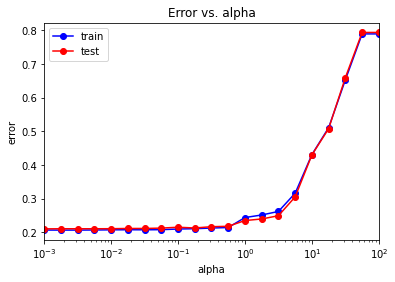

In [119]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

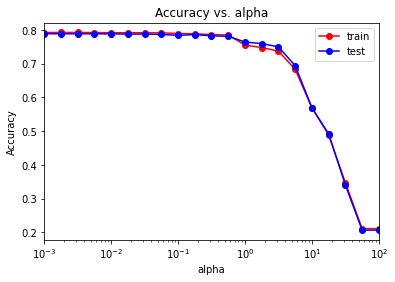

In [120]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [121]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.20704332108914933 0.21073802028681357


Оптимальное значение alpha:

In [122]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001]


In [123]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном оптимальном значении alpha:

In [125]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (3,),
                          solver = 'adam', activation = 'logistic', random_state = 42, max_iter=1000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.20727654364177017
0.21073802028681357


### Зависимость ошибки от числа нейронов

In [126]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for k in range(3,10):
    mlp_model = MLPClassifier(hidden_layer_sizes = (k,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

In [128]:
number = np.arange(3,10)

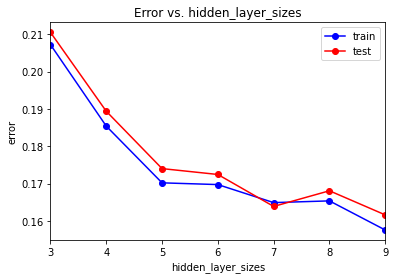

In [129]:
plt.plot(number, train_err, 'b-o', label = 'train')
plt.plot(number, test_err, 'r-o', label = 'test')
plt.xlim([np.min(number), np.max(number)])
plt.title('Error vs. hidden_layer_sizes')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('error')
plt.legend()

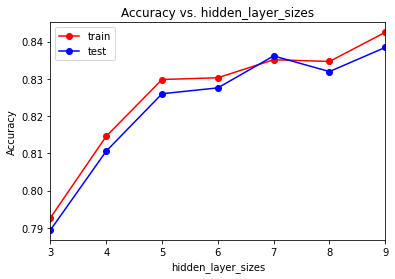

In [130]:
plt.plot(number, train_acc, 'r-o', label = 'train')
plt.plot(number, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(number), np.max(number)])
plt.title('Accuracy vs. hidden_layer_sizes')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Accuracy')
plt.legend()

### Матрица рассогласования:

In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 965   92    3   59    9]
 [  74  810    0   71    2]
 [   2    0 1017   41   93]
 [  76  104   39  960   35]
 [  15   15  120   74 1042]]


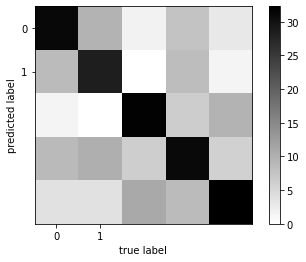

In [132]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### Другие метрики качества:

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.86      0.85      0.85      1132
           3       0.85      0.79      0.82      1021
           6       0.88      0.86      0.87      1179
           7       0.79      0.80      0.79      1205
           9       0.82      0.88      0.85      1181

    accuracy                           0.84      5718
   macro avg       0.84      0.84      0.84      5718
weighted avg       0.84      0.84      0.84      5718



### Выводы:
Можно отметить, что при увеличении параметра альфа ошибка значительно нарастает, сеть недобучается. При увеличении числа нейронов происходит улучшение точности, причем на данных значениях от 3 до 10 ошибка на трайне и тесте отличается не сильно, больших расхождений нет.